# Projet : Morphotypes du corps humain
#### Objectif
- classifier les types de morphologies du corps humain

#### Modèle
- clustering non supervisé

#### Importation des packages nécessaires

In [1]:
try:
    import pandas as pd
except:
    %pip install pandas
    import pandas as pd
try:
    import seaborn as sns
except:
    %pip install seaborn
    import seaborn as sns
try:
    from sklearn.cluster import KMeans, AgglomerativeClustering
except:
    %pip install scikit-learn
    from sklearn.cluster import KMeans, AgglomerativeClustering
try:
    from sklearn_extra.cluster import KMedoids
except:
    %pip install scikit-learn-extra
    from sklearn_extra.cluster import KMedoids
try:
    from yellowbrick.cluster import KElbowVisualizer
except:
    %pip install yellowbrick
    from yellowbrick.cluster import KElbowVisualizer

import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

# 1. Exploration du jeu de données

- On importe la base de données ANSUR II concernant des mesurations d'hommes

Pour plus d'informations concernant cette base, voir : https://www.openlab.psu.edu/ansur2/

In [2]:
# chemin vers le jeu de données (A CHANGER SI NECESSAIRE)
df = pd.read_csv('http://tools.openlab.psu.edu/publicData/ANSUR_II_MALE_Public.csv', encoding = "ISO-8859-1")

- Taille du jeu de données

In [3]:
df.shape

(4082, 108)

- Premières lignes du jeu de données

In [4]:
df.head(10)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand
5,10115,263,1407,344,216,1293,228,184,404,340,...,Combat Service Support,91L,Kentucky,1,NaN,1,39,69,175,Right hand
6,10117,314,1476,343,257,1378,280,207,453,452,...,Combat Service Support,91D,Mississippi,2,NaN,2,32,72,250,Right hand
7,10237,304,1529,360,254,1402,247,206,425,332,...,Combat Service Support,88M,Romania,1,NaN,1,23,74,211,Right hand
8,10242,321,1457,339,230,1345,257,198,415,379,...,Combat Service Support,92F,Arkansas,1,NaN,1,36,70,220,Right hand
9,10244,227,1481,345,233,1372,264,204,406,325,...,Combat Support,25L,Maryland,1,NaN,1,23,72,160,Left hand


- On regarde le type des colonnes

In [5]:
df.dtypes

subjectid                          int64
abdominalextensiondepthsitting     int64
acromialheight                     int64
acromionradialelength              int64
anklecircumference                 int64
                                   ...  
DODRace                            int64
Age                                int64
Heightin                           int64
Weightlbs                          int64
WritingPreference                 object
Length: 108, dtype: object

- Répartition des valeurs manquantes

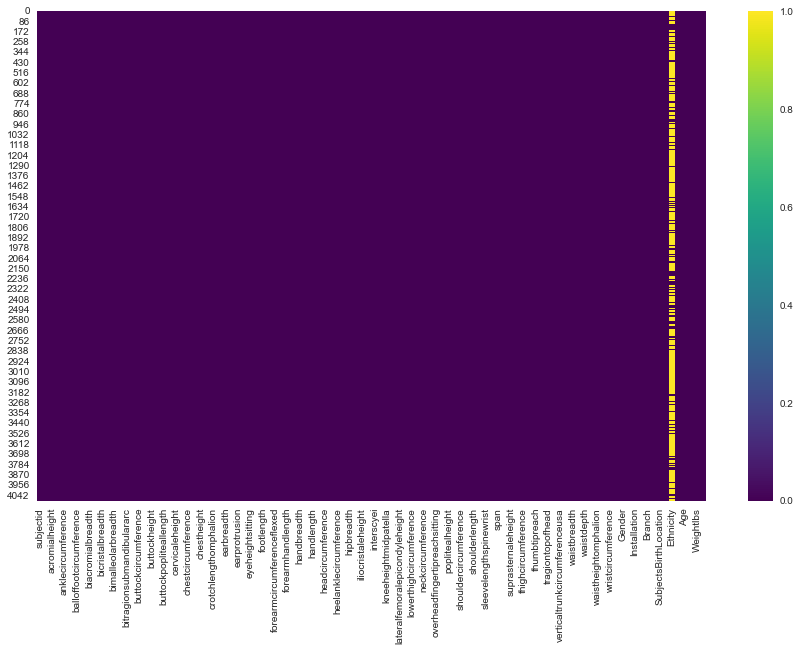

In [6]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

- Tableau de corrélation des caractéristiques

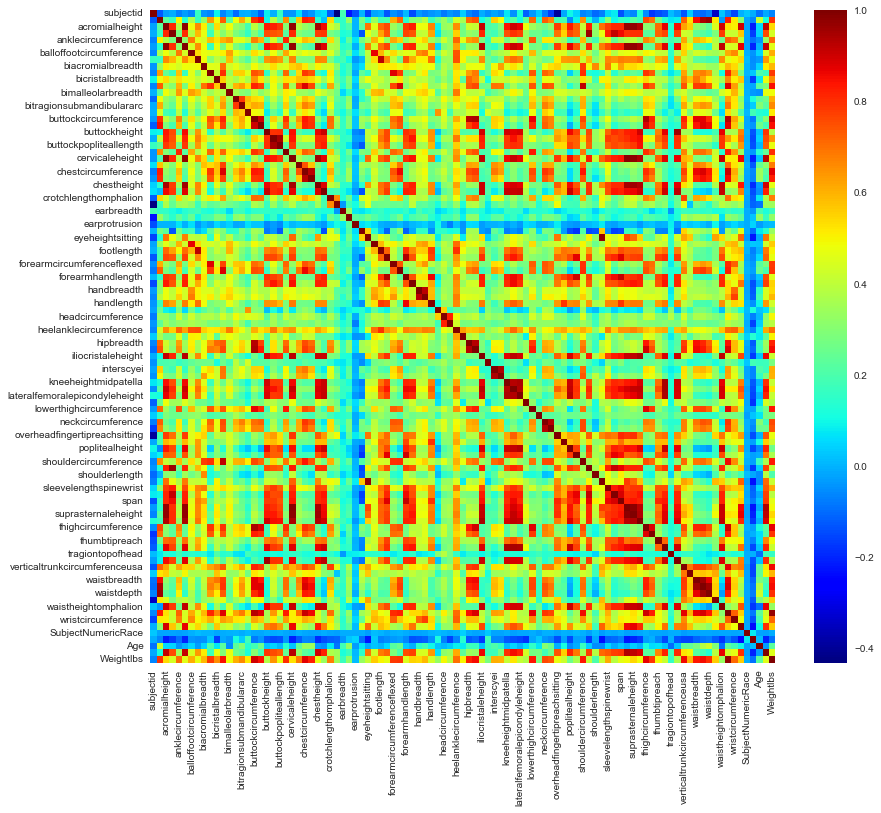

In [7]:
fig, ax = plt.subplots(figsize=(14, 12)) # Pour augmenter la taille de la figure
sns.heatmap(df.corr(), cmap="jet");

# 2. Préparation du jeu de données

In [8]:
columns = ['bicristalbreadth',
           'buttockcircumference',
           'buttockdepth',
           'chestbreadth',
           'chestcircumference',
           'chestdepth',
           'hipbreadth',
           'lowerthighcircumference',
           'shouldercircumference',
           'thighcircumference',
           'verticaltrunkcircumferenceusa',
           'waistbreadth',
           'waistcircumference',
           'waistdepth']

df_fit_ = pd.DataFrame(df, columns=columns)

#### Matrice de corrélation

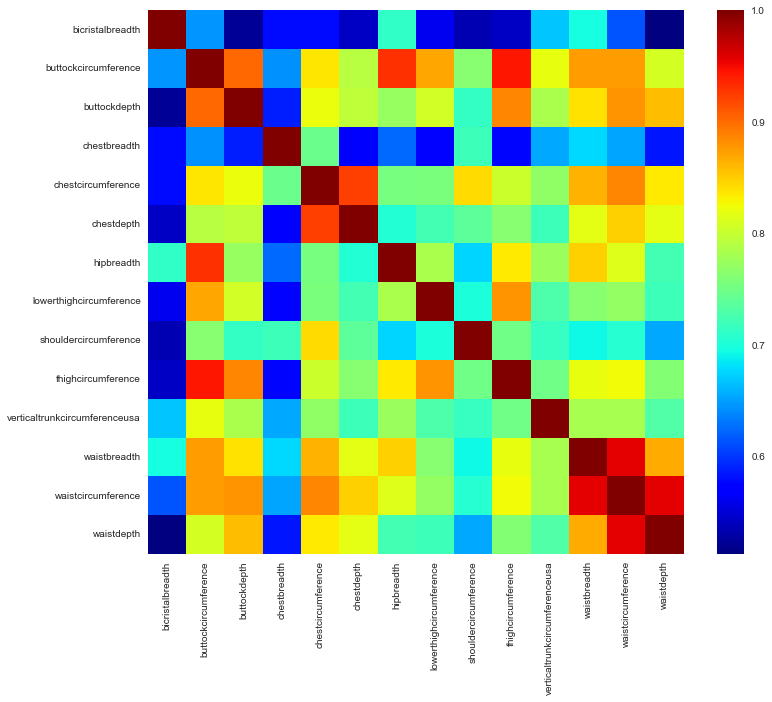

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_fit_.corr(), cmap="jet")
plt.show()

#### Normalisation des données

In [10]:
df_fit = (df_fit_.copy() - df_fit_.mean()) / df_fit_.std()

### Méthode elbow

#### K-Medoids

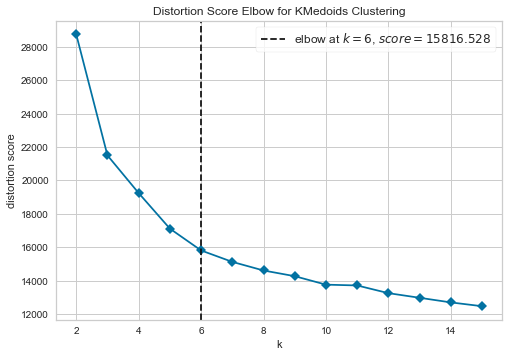

<AxesSubplot:title={'center':'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
model = KMedoids(method='pam')
visualizer = KElbowVisualizer(model, k=(2, 16), timings=False)

visualizer.fit(df_fit)   # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### K-Means

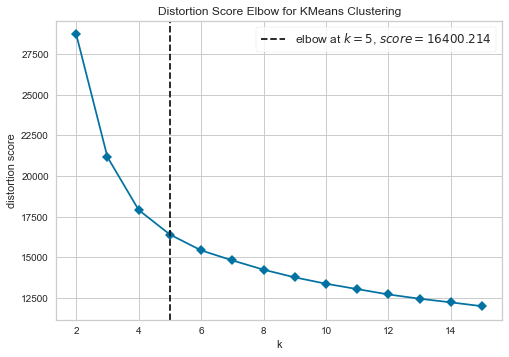

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 16), timings=False)

visualizer.fit(df_fit)   # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### Hierarchical

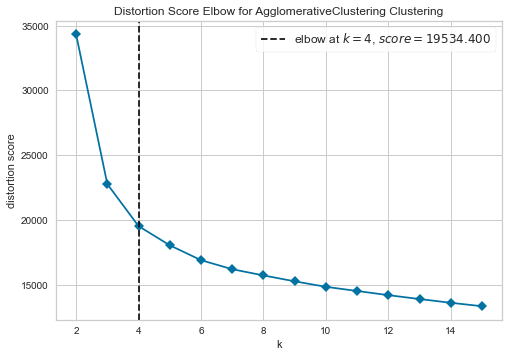

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
model = AgglomerativeClustering(linkage='ward')
visualizer = KElbowVisualizer(model, k=(2, 16), timings=False)

visualizer.fit(df_fit)   # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Visualisation

In [14]:
colors = ['ro', 'g^', 'bs', 'cX', 'yP', 'm*', 'kH']


def clustering(data, method, plot=True):
    method.fit(data)
    identified_clusters = method.fit_predict(data)

    acp = PCA(n_components=2, svd_solver='full')
    coord = acp.fit_transform(data)

    if not plot:
        print(100*sum(acp.explained_variance_ratio_),
              '% ot the variance retained')
    else:
        x_proj = acp.transform(data)
        x_proj = pd.DataFrame(data=x_proj, columns=[
            'Composante principale 1', 'Composante principale 2'])
        x_proj['Clusters'] = identified_clusters

        fig, ax = plt.subplots(figsize=(25, 25))
        plt.xlabel('First component: {:.2f}%'.format(
            100*acp.explained_variance_ratio_[0]), fontsize=20)
        plt.ylabel('Second component: {:.2f}%'.format(
            100*acp.explained_variance_ratio_[1]), fontsize=20)
        for i in range(x_proj['Clusters'].max()+1):
            plt.plot(x_proj[x_proj['Clusters'] == i]['Composante principale 1'],
                     x_proj[x_proj['Clusters'] == i]['Composante principale 2'],
                     colors[i], label='Cluster {}'.format(i+1), alpha=0.7)
        plt.legend(loc='best', fontsize=20)
        plt.show()

#### Hierarchical

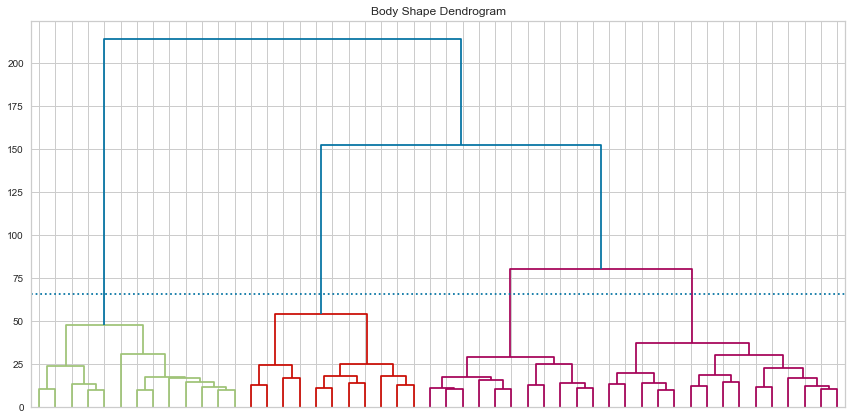

In [15]:
plt.figure(figsize=(12, 6))
plt.title("Body Shape Dendrogram")
dend = shc.dendrogram(shc.linkage(df_fit, method='ward'),
                      p=50, truncate_mode='lastp', show_leaf_counts=False)
plt.plot([0, 500], [66, 66], ':')
plt.tight_layout()

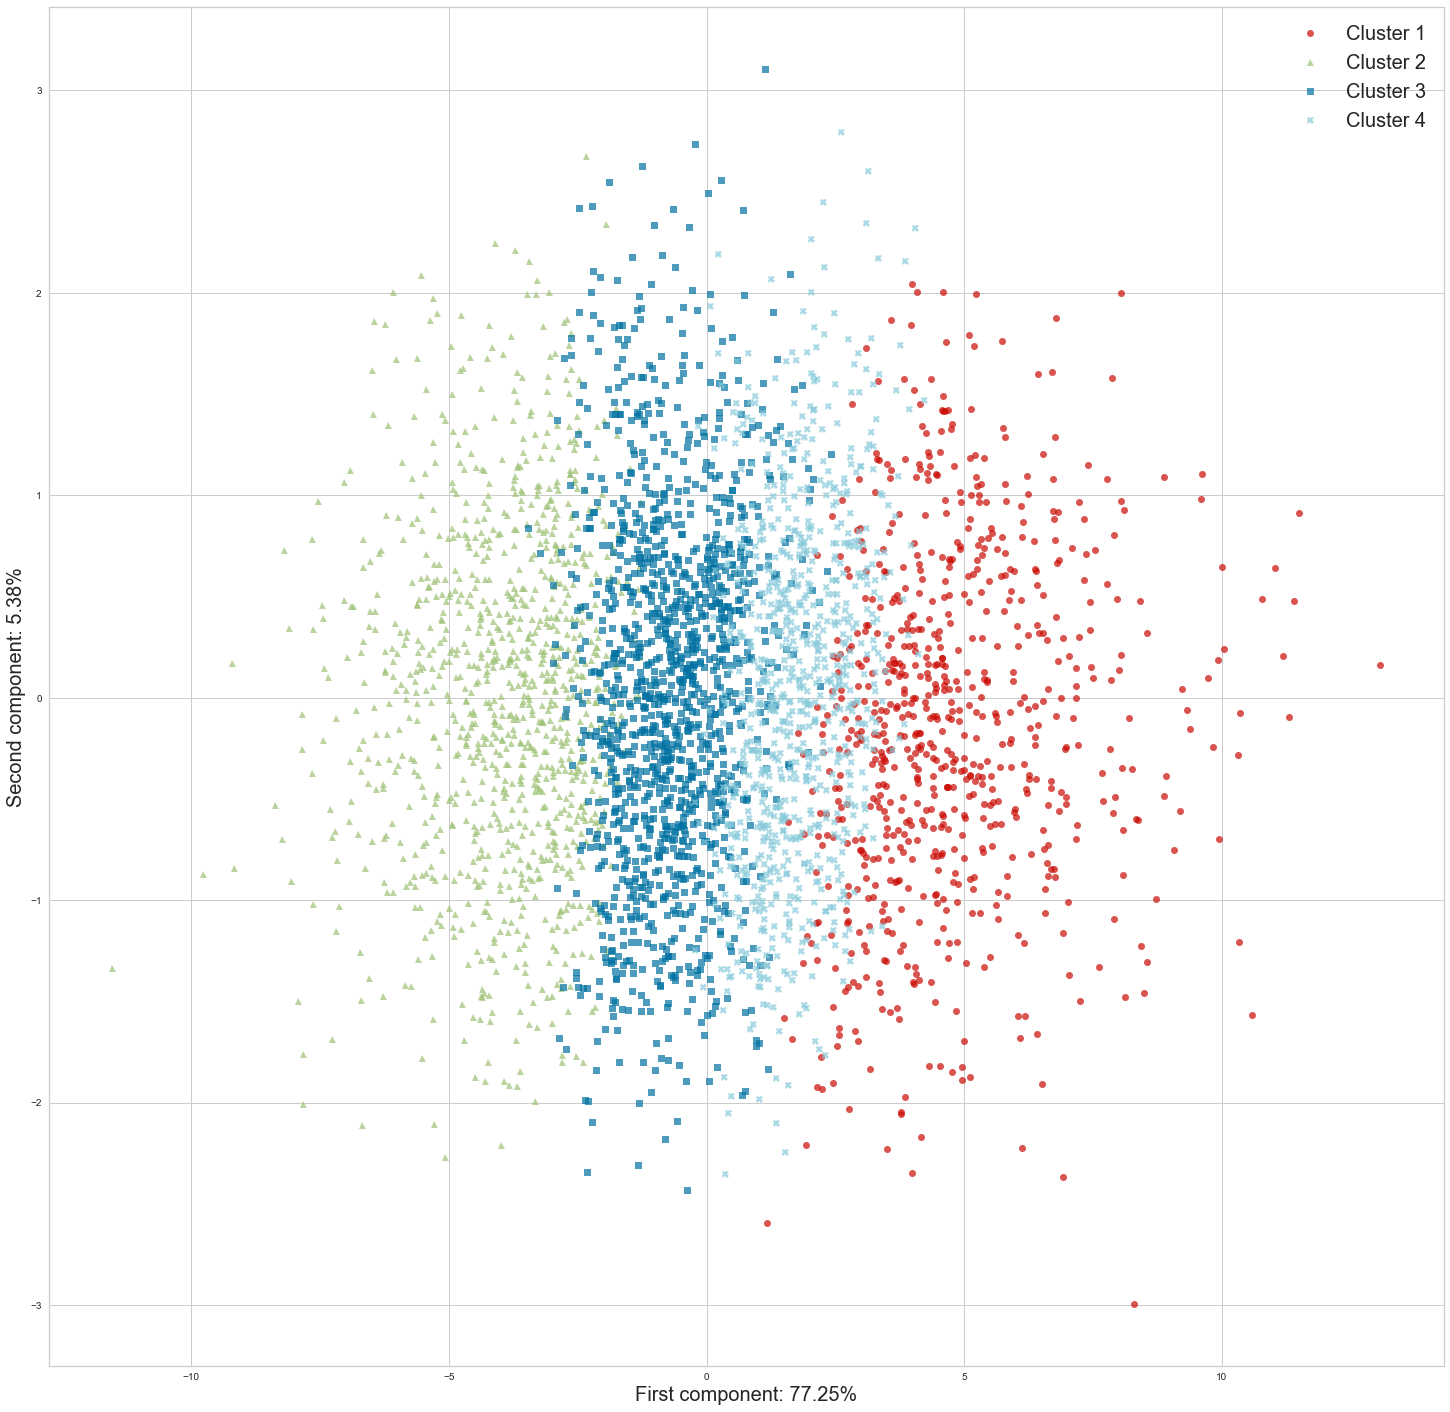

In [16]:
clustering(df_fit, AgglomerativeClustering(4, linkage='ward'))

#### K-Means

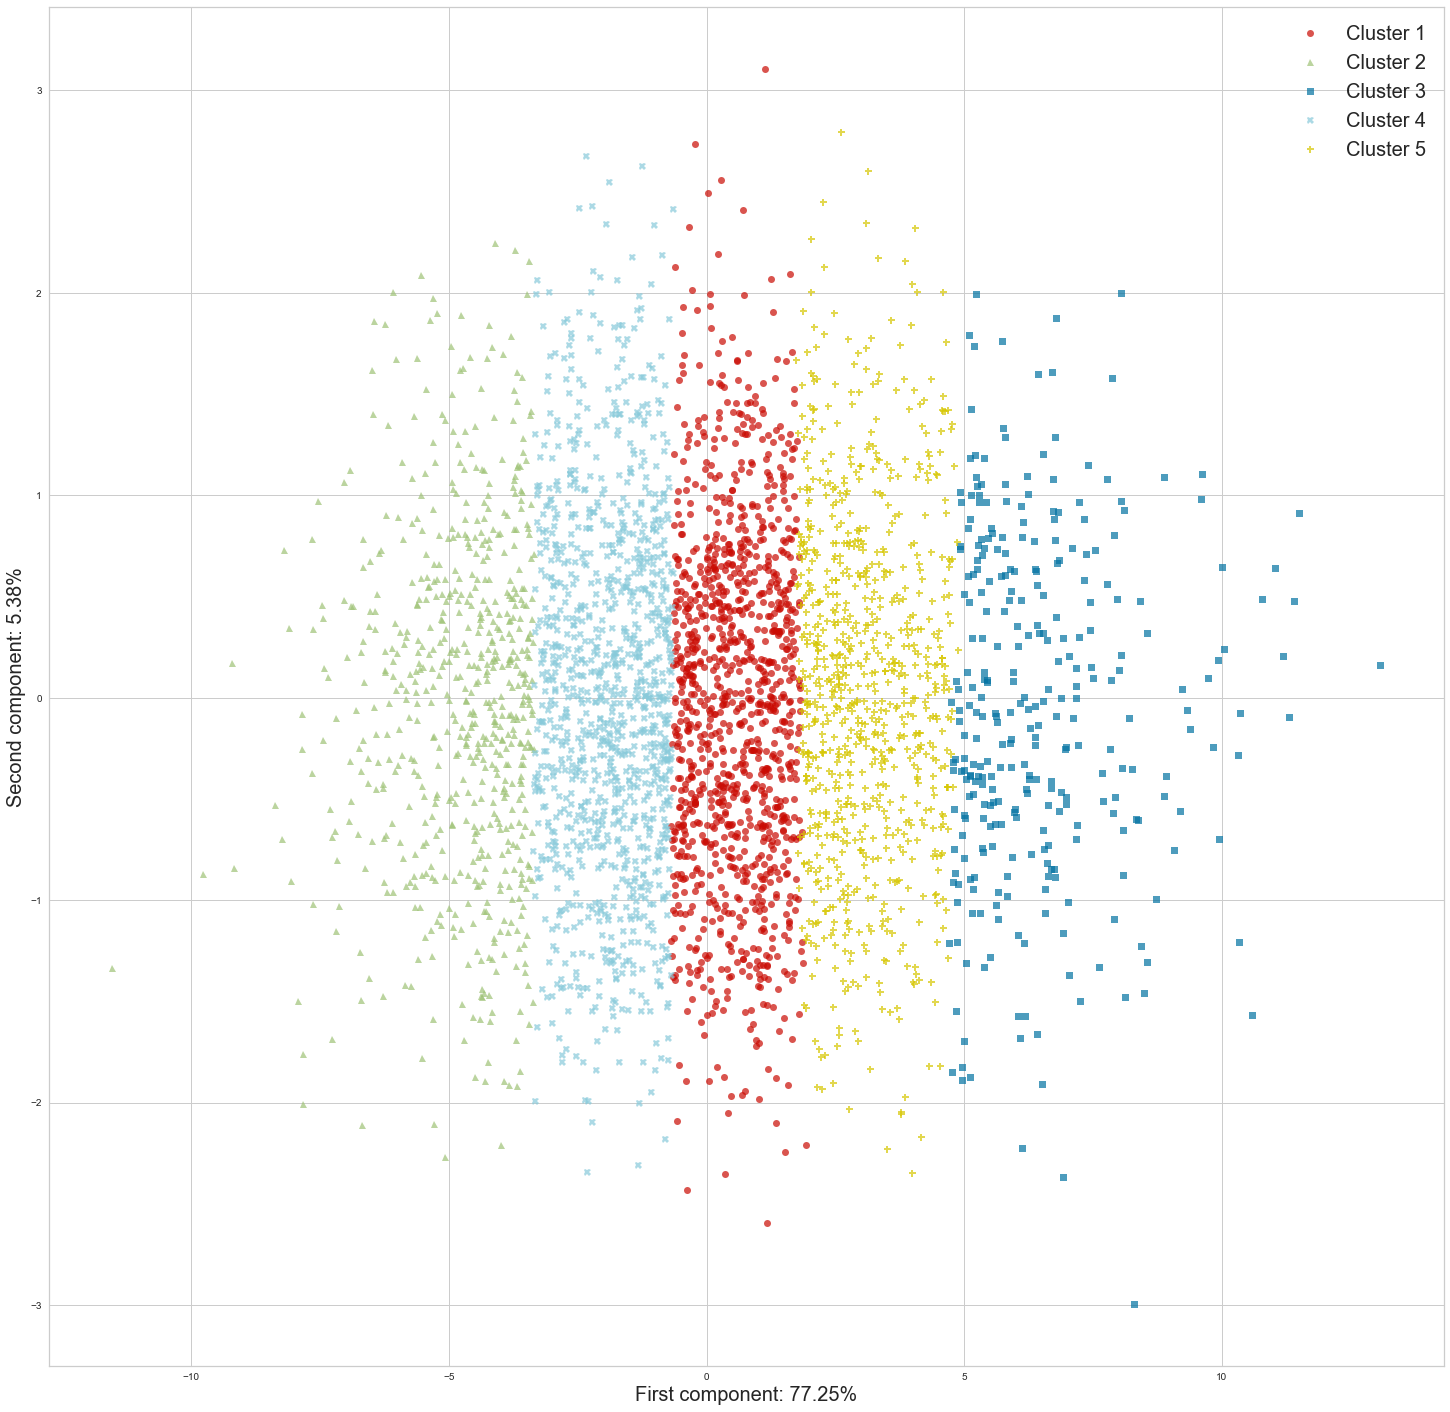

In [17]:
clustering(df_fit, KMeans(5))

#### K-Medoids

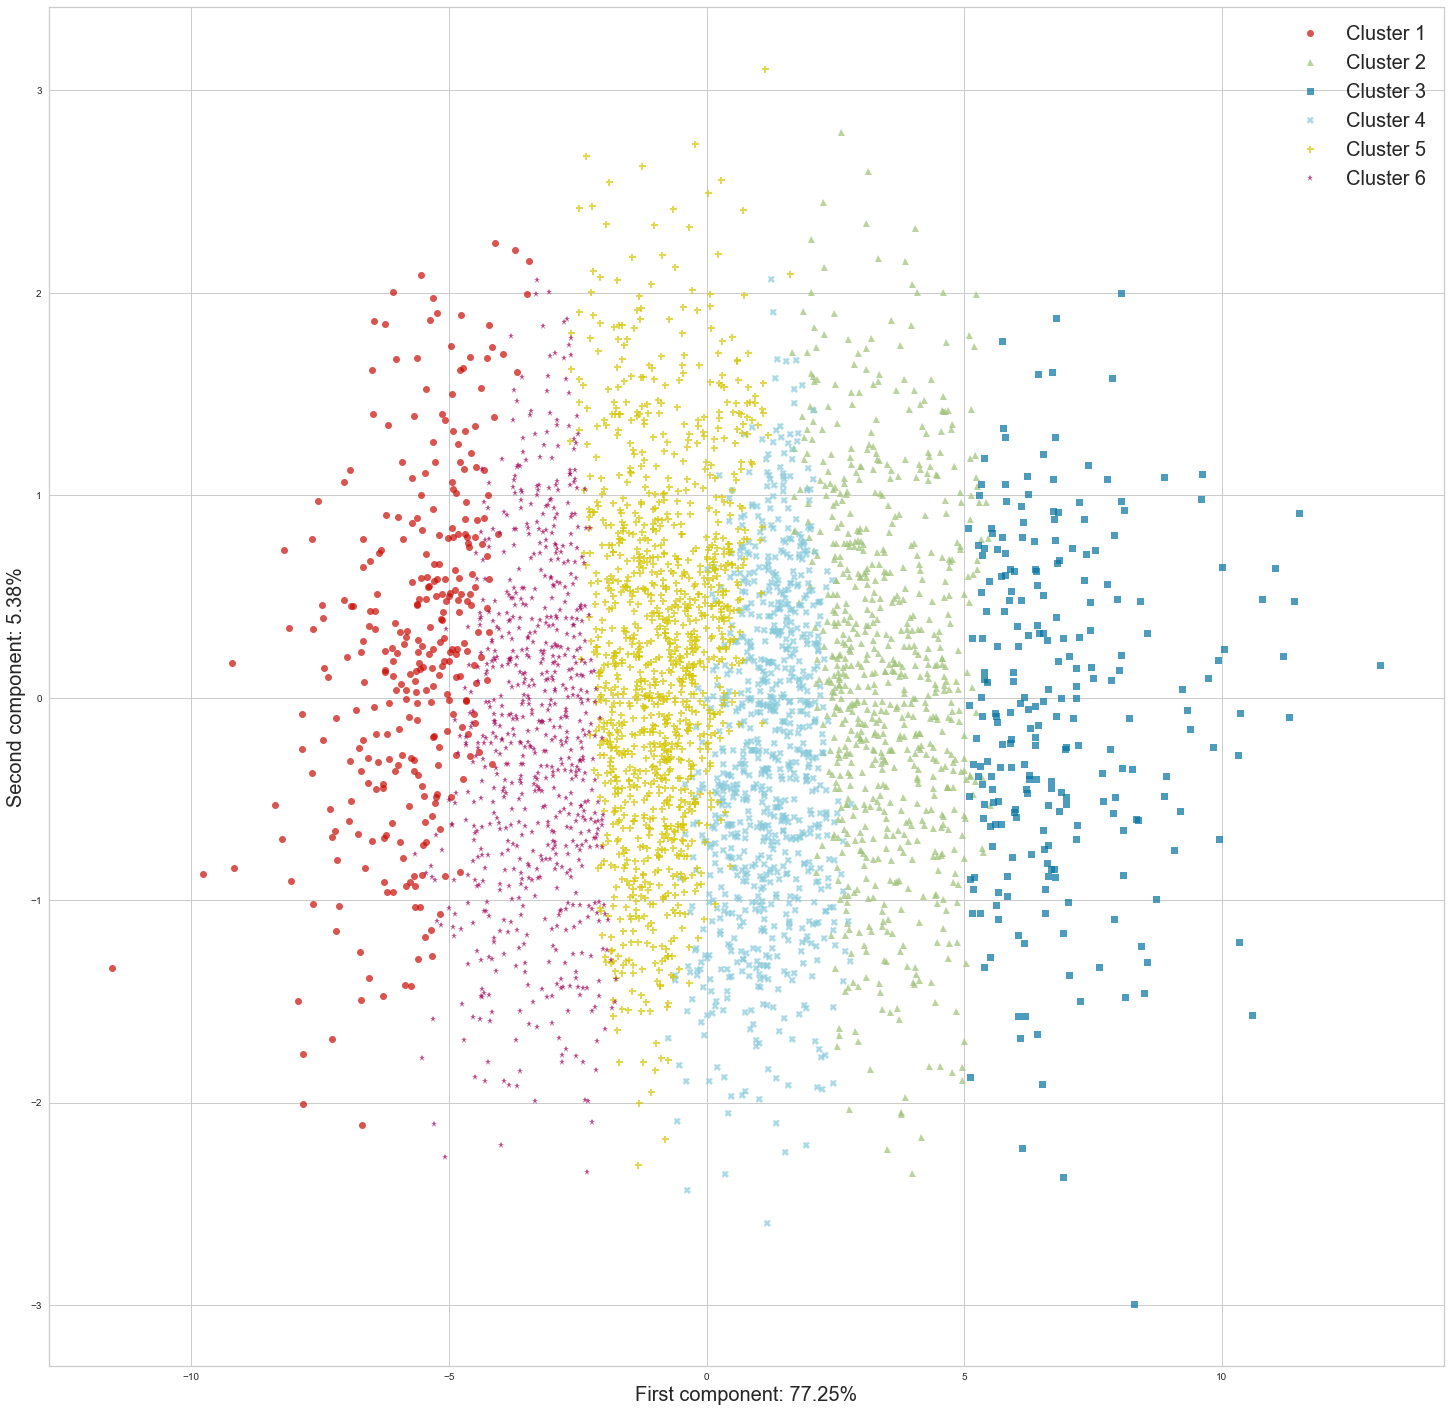

In [18]:
clustering(df_fit, KMedoids(6, method='pam'))

### Clusters Descriptions

#### Hierarchical

In [19]:
method = AgglomerativeClustering(4, linkage='ward')
method.fit(df_fit)
identified_clusters = method.fit_predict(df_fit)

df_means = df.select_dtypes(include='number').copy()

df_means["Cluster"] = identified_clusters.copy()
df_means["Weight"] = df_means["Weightlbs"].copy() * 0.453592
df_means["Height"] = df_means["Heightin"].copy() * 2.54
df_means["BMI"] = 10000 * df_means['Weight'] / df_means['Height']**2
df_fit_["Cluster"] = identified_clusters.copy()

In [20]:
todrop = ['subjectid',
          'SubjectNumericRace',
          'DODRace',
          'Weightlbs',
          'weightkg',
          'Heightin']

for col in todrop:
    df_means.pop(col)

In [21]:
df_medoids = df_fit.copy()
df_medoids["Cluster"] = identified_clusters.copy()

In [22]:
df_means.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,Age,Cluster,Weight,Height,BMI
count,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,...,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000
mean,254.650906,1440.736894,335.244488,229.343949,1329.082068,252.017148,200.935081,415.675649,358.135718,275.433366,...,237.771436,387.642822,1056.485301,175.916707,847.511514,30.158991,1.593827,85.277518,177.890848,26.925742
std,37.327178,63.287242,17.482795,14.649102,59.516123,12.936131,10.470947,19.161654,34.618093,17.513508,...,34.732597,29.349007,52.154671,8.955055,41.655628,8.810118,1.024159,13.581392,7.486444,3.804242
min,163.000000,1194.000000,270.000000,156.000000,1106.000000,186.000000,156.000000,337.000000,246.000000,219.000000,...,151.000000,293.000000,876.000000,141.000000,695.000000,17.000000,0.000000,0.000000,152.400000,0.000000
25%,227.000000,1398.000000,324.000000,219.250000,1289.000000,243.000000,194.000000,403.000000,335.000000,263.000000,...,212.000000,367.000000,1020.000000,170.000000,819.000000,23.000000,1.000000,76.203456,172.720000,24.327647
50%,251.000000,1439.000000,335.000000,228.000000,1328.000000,252.000000,201.000000,415.000000,357.000000,275.000000,...,234.000000,386.000000,1055.000000,176.000000,847.000000,28.000000,2.000000,83.914520,177.800000,26.625469
75%,279.000000,1481.000000,346.000000,239.000000,1367.000000,261.000000,208.000000,428.000000,380.000000,288.000000,...,261.000000,407.000000,1090.000000,182.000000,875.000000,36.000000,2.000000,93.893544,182.880000,29.288966
max,451.000000,1683.000000,393.000000,293.000000,1553.000000,306.000000,245.000000,489.000000,490.000000,334.000000,...,406.000000,494.000000,1245.000000,216.000000,1009.000000,58.000000,3.000000,145.603032,238.760000,43.094450


#### Cluster 1

In [23]:
df_medoid1 = df_medoids[df_medoids["Cluster"] == 0]
medoid1 = np.argmin(((df_medoid1 - df_medoid1.mean())**2).sum(axis=1))
print(medoid1)

725


**Description**

In [24]:
cluster1 = df_means[df_means["Cluster"]==0]
cluster1.pop('Cluster')
cluster1.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,Age,Weight,Height,BMI
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,...,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,304.861930,1477.329759,342.352547,244.068365,1355.785523,262.184987,206.317694,430.209115,396.864611,292.697051,...,1097.063003,285.356568,410.709115,1066.936997,184.721180,875.781501,32.372654,104.658754,181.095871,31.952367
std,27.620165,60.301000,17.880749,13.511989,58.573692,12.236291,10.023577,18.233511,27.282891,14.361093,...,68.687875,26.192861,28.196670,53.755824,8.109652,38.657564,8.705657,9.500624,7.215439,2.762518
min,239.000000,1297.000000,287.000000,204.000000,1171.000000,224.000000,179.000000,368.000000,324.000000,250.000000,...,920.000000,228.000000,337.000000,892.000000,160.000000,763.000000,19.000000,74.842680,152.400000,22.377775
25%,285.000000,1439.000000,331.000000,235.000000,1317.000000,254.000000,200.000000,417.000000,377.000000,283.000000,...,1050.000000,267.000000,392.000000,1030.000000,180.000000,850.000000,25.000000,98.883056,175.260000,30.131529
50%,303.000000,1478.000000,342.000000,244.000000,1356.000000,262.000000,205.000000,429.000000,394.000000,292.000000,...,1089.000000,283.500000,410.000000,1068.000000,184.000000,875.000000,31.000000,104.326160,180.340000,31.711210
75%,320.000000,1518.000000,353.000000,253.000000,1395.000000,270.000000,212.750000,443.000000,413.750000,302.000000,...,1136.000000,301.000000,430.000000,1105.000000,190.000000,903.000000,39.000000,109.315672,185.420000,33.472835
max,451.000000,1653.000000,390.000000,293.000000,1530.000000,306.000000,245.000000,489.000000,490.000000,334.000000,...,1379.000000,406.000000,494.000000,1225.000000,216.000000,1005.000000,58.000000,145.603032,203.200000,43.094450


**Medoid**

In [25]:
df_fit_[df_fit_["Cluster"] == 0].iloc[medoid1]

bicristalbreadth                  288
buttockcircumference             1134
buttockdepth                      278
chestbreadth                      304
chestcircumference               1118
chestdepth                        289
hipbreadth                        383
lowerthighcircumference           459
shouldercircumference            1234
thighcircumference                718
verticaltrunkcircumferenceusa    1776
waistbreadth                      376
waistcircumference               1110
waistdepth                        286
Cluster                             0
Name: 3906, dtype: int64

In [26]:
cluster1.iloc[medoid1]

abdominalextensiondepthsitting     286.000000
acromialheight                    1441.000000
acromionradialelength              330.000000
anklecircumference                 234.000000
axillaheight                      1321.000000
                                     ...     
wristheight                        868.000000
Age                                 28.000000
Weight                             103.872568
Height                             177.800000
BMI                                 32.857715
Name: 3906, Length: 96, dtype: float64

#### Cluster 2

In [27]:
df_medoid2 = df_medoids[df_medoids["Cluster"] == 1]
medoid2 = np.argmin(((df_medoid2 - df_medoid2.mean())**2).sum(axis=1))
print(medoid2)

456


**Description**

In [28]:
cluster2 = df_means[df_means["Cluster"]==1]
cluster2.pop('Cluster')
cluster2.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,Age,Weight,Height,BMI
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.00000,1068.000000,1068.000000,1068.000000,...,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,216.275281,1410.208801,328.680712,217.597378,1307.579588,243.774345,196.67603,403.117041,324.538390,261.515918,...,813.054307,201.727528,366.618914,1045.132022,168.930712,824.898876,26.043071,70.503826,175.186273,23.010218
std,17.932161,60.745173,16.795928,10.913259,58.227089,10.930925,9.68036,16.712979,24.439268,13.849057,...,50.164704,15.238735,22.157397,50.710162,7.169319,39.154981,7.106106,6.509861,7.347355,2.100145
min,163.000000,1194.000000,270.000000,156.000000,1106.000000,186.000000,156.00000,337.000000,246.000000,219.000000,...,648.000000,151.000000,293.000000,876.000000,141.000000,695.000000,18.000000,39.916096,152.400000,15.379635
25%,204.000000,1370.000000,317.000000,210.000000,1266.750000,236.000000,190.00000,393.000000,309.000000,253.000000,...,778.000000,192.000000,353.000000,1010.000000,164.000000,798.000000,21.000000,67.131616,170.180000,21.617873
50%,216.000000,1410.000000,328.000000,218.000000,1307.000000,244.000000,197.00000,403.000000,325.000000,261.000000,...,814.500000,202.000000,366.000000,1044.000000,169.000000,825.000000,24.000000,70.306760,175.260000,23.023200
75%,228.000000,1449.000000,340.000000,225.000000,1344.000000,251.000000,203.00000,414.000000,339.000000,271.000000,...,849.000000,212.000000,380.000000,1080.000000,174.000000,849.000000,29.000000,74.842680,180.340000,24.365971
max,276.000000,1611.000000,392.000000,267.000000,1490.000000,278.000000,225.00000,458.000000,410.000000,307.000000,...,962.000000,251.000000,430.000000,1199.000000,193.000000,946.000000,58.000000,132.448864,218.440000,38.524329


**Medoid**

In [29]:
df_fit_[df_fit_["Cluster"] == 1].iloc[medoid2]

bicristalbreadth                  261
buttockcircumference              954
buttockdepth                      224
chestbreadth                      275
chestcircumference                968
chestdepth                        232
hipbreadth                        318
lowerthighcircumference           382
shouldercircumference            1112
thighcircumference                579
verticaltrunkcircumferenceusa    1561
waistbreadth                      286
waistcircumference                811
waistdepth                        204
Cluster                             1
Name: 1999, dtype: int64

In [30]:
cluster2.iloc[medoid2]

abdominalextensiondepthsitting     217.000000
acromialheight                    1393.000000
acromionradialelength              317.000000
anklecircumference                 202.000000
axillaheight                      1300.000000
                                     ...     
wristheight                        853.000000
Age                                 22.000000
Weight                              67.131616
Height                             170.180000
BMI                                 23.179820
Name: 1999, Length: 96, dtype: float64

#### Cluster 3

In [31]:
df_medoid3 = df_medoids[df_medoids["Cluster"] == 2]
medoid3 = np.argmin(((df_medoid3 - df_medoid3.mean())**2).sum(axis=1))
print(medoid3)

375


**Description**

In [32]:
cluster3 = df_means[df_means["Cluster"]==2]
cluster3.pop('Cluster')
cluster3.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,Age,Weight,Height,BMI
count,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,...,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000
mean,245.776720,1437.169107,334.953148,227.245242,1326.968521,250.750366,200.568814,415.434846,354.888726,271.975842,...,915.666179,229.346266,384.497804,1058.596633,174.721083,843.252562,30.492679,82.315326,177.734919,26.116874
std,20.071938,58.777833,16.514329,10.972588,57.420304,11.112408,10.123452,16.956434,23.847640,13.373644,...,48.687745,18.065433,24.170692,52.200534,6.797259,37.852324,8.807482,6.037915,7.416662,2.082811
min,193.000000,1253.000000,283.000000,190.000000,1150.000000,215.000000,171.000000,358.000000,278.000000,227.000000,...,772.000000,178.000000,308.000000,897.000000,153.000000,728.000000,17.000000,0.000000,152.400000,0.000000
25%,232.000000,1398.000000,324.000000,220.000000,1287.250000,243.000000,194.000000,404.000000,339.000000,263.000000,...,882.000000,217.000000,368.000000,1022.000000,170.000000,817.000000,23.000000,78.925008,172.720000,24.965156
50%,244.000000,1435.000000,334.000000,227.000000,1327.000000,250.000000,200.000000,415.000000,353.000000,272.000000,...,915.000000,228.000000,383.000000,1057.500000,175.000000,843.000000,28.000000,81.646560,177.800000,25.950459
75%,258.000000,1474.000000,346.000000,234.000000,1363.000000,258.000000,207.000000,426.000000,368.000000,281.000000,...,951.000000,241.000000,400.000000,1092.000000,179.000000,868.000000,37.000000,86.182480,182.880000,27.368603
max,332.000000,1654.000000,393.000000,262.000000,1535.000000,294.000000,233.000000,471.000000,450.000000,315.000000,...,1061.000000,300.000000,458.000000,1245.000000,194.000000,1009.000000,57.000000,104.326160,238.760000,33.571706


**Medoid**

In [33]:
df_fit_[df_fit_["Cluster"] == 2].iloc[medoid3]

bicristalbreadth                  275
buttockcircumference             1004
buttockdepth                      242
chestbreadth                      288
chestcircumference               1026
chestdepth                        241
hipbreadth                        345
lowerthighcircumference           403
shouldercircumference            1173
thighcircumference                613
verticaltrunkcircumferenceusa    1657
waistbreadth                      322
waistcircumference                902
waistdepth                        220
Cluster                             2
Name: 1107, dtype: int64

In [34]:
cluster3.iloc[medoid3]

abdominalextensiondepthsitting     239.000000
acromialheight                    1425.000000
acromionradialelength              344.000000
anklecircumference                 220.000000
axillaheight                      1321.000000
                                     ...     
wristheight                        839.000000
Age                                 28.000000
Weight                              79.378600
Height                             175.260000
BMI                                 25.842696
Name: 1107, Length: 96, dtype: float64

#### Cluster 4

In [35]:
df_medoid4 = df_medoids[df_medoids["Cluster"] == 3]
medoid4 = np.argmin(((df_medoid4 - df_medoid4.mean())**2).sum(axis=1))
print(medoid4)

534


**Description**

In [36]:
cluster4 = df_means[df_means["Cluster"]==3]
cluster4.pop('Cluster')
cluster4.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,Age,Weight,Height,BMI
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,...,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,272.001109,1452.022173,337.578714,234.252772,1335.657428,255.286031,202.080931,418.890244,370.802661,282.870288,...,999.873614,253.852550,398.221729,1058.086475,178.717295,857.354767,32.696231,91.226805,178.678581,28.629547
std,20.859421,56.310673,16.562260,11.122982,54.849781,11.239211,10.014368,15.796083,22.072901,13.068836,...,45.101902,18.603265,26.193501,50.051020,6.777166,35.287160,8.990362,6.078927,6.761149,2.110429
min,210.000000,1274.000000,281.000000,203.000000,1158.000000,226.000000,167.000000,370.000000,313.000000,249.000000,...,847.000000,202.000000,302.000000,919.000000,161.000000,753.000000,18.000000,49.895120,152.400000,14.512590
25%,258.000000,1415.000000,327.000000,226.250000,1299.000000,247.000000,195.000000,409.000000,356.000000,273.000000,...,970.000000,240.000000,382.000000,1025.000000,174.000000,834.000000,25.000000,87.089664,175.260000,27.261859
50%,272.000000,1450.000000,337.000000,234.000000,1334.500000,255.000000,201.000000,419.000000,370.000000,283.000000,...,1000.000000,253.500000,398.000000,1057.000000,178.000000,857.000000,31.000000,90.718400,177.800000,28.591380
75%,287.000000,1486.000000,348.000000,242.000000,1368.750000,263.000000,209.000000,429.000000,384.000000,292.000000,...,1030.750000,267.000000,415.750000,1089.750000,183.000000,880.000000,40.000000,95.254320,182.880000,29.953236
max,328.000000,1683.000000,390.000000,270.000000,1553.000000,297.000000,234.000000,471.000000,462.000000,328.000000,...,1139.000000,313.000000,471.000000,1211.000000,206.000000,996.000000,58.000000,108.862080,200.660000,41.012359


**Medoid**

In [37]:
df_fit_[df_fit_["Cluster"] == 3].iloc[medoid4]

bicristalbreadth                  282
buttockcircumference             1073
buttockdepth                      251
chestbreadth                      298
chestcircumference               1100
chestdepth                        266
hipbreadth                        362
lowerthighcircumference           437
shouldercircumference            1190
thighcircumference                653
verticaltrunkcircumferenceusa    1682
waistbreadth                      362
waistcircumference               1012
waistdepth                        255
Cluster                             3
Name: 2277, dtype: int64

In [38]:
cluster4.iloc[medoid4]

abdominalextensiondepthsitting     267.000000
acromialheight                    1525.000000
acromionradialelength              362.000000
anklecircumference                 227.000000
axillaheight                      1400.000000
                                     ...     
wristheight                        863.000000
Age                                 24.000000
Weight                              96.615096
Height                             185.420000
BMI                                 28.101651
Name: 2277, Length: 96, dtype: float64

### *K-Medoids*

In [39]:
method = AgglomerativeClustering(6, linkage='ward')
method.fit(df_fit)
identified_clusters = method.fit_predict(df_fit)

df_means = df.select_dtypes(include='number').copy()

df_means["Cluster"] = identified_clusters.copy()
df_means["Weight"] = df_means["Weightlbs"].copy() * 0.453592
df_means["Height"] = df_means["Heightin"].copy() * 2.54
df_means["BMI"] = 10000 * df_means['Weight'] / df_means['Height']**2
df_fit_["Cluster"] = identified_clusters.copy()

todrop = ['subjectid',
          'SubjectNumericRace',
          'DODRace',
          'Weightlbs',
          'weightkg',
          'Heightin']

for col in todrop:
    df_means.pop(col)

In [40]:
df_medoids = df_fit.copy()
df_medoids["Cluster"] = identified_clusters.copy()

#### Cluster 1

In [41]:
df_medoid1 = df_medoids[df_medoids["Cluster"] == 0]
medoid1 = np.argmin(((df_medoid1 - df_medoid1.mean())**2).sum(axis=1))
print(medoid1)

375


**Description**

In [42]:
cluster1 = df_means[df_means["Cluster"] == 0]
cluster1.pop('Cluster')
cluster1.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,Age,Weight,Height,BMI
count,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,...,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000
mean,245.776720,1437.169107,334.953148,227.245242,1326.968521,250.750366,200.568814,415.434846,354.888726,271.975842,...,915.666179,229.346266,384.497804,1058.596633,174.721083,843.252562,30.492679,82.315326,177.734919,26.116874
std,20.071938,58.777833,16.514329,10.972588,57.420304,11.112408,10.123452,16.956434,23.847640,13.373644,...,48.687745,18.065433,24.170692,52.200534,6.797259,37.852324,8.807482,6.037915,7.416662,2.082811
min,193.000000,1253.000000,283.000000,190.000000,1150.000000,215.000000,171.000000,358.000000,278.000000,227.000000,...,772.000000,178.000000,308.000000,897.000000,153.000000,728.000000,17.000000,0.000000,152.400000,0.000000
25%,232.000000,1398.000000,324.000000,220.000000,1287.250000,243.000000,194.000000,404.000000,339.000000,263.000000,...,882.000000,217.000000,368.000000,1022.000000,170.000000,817.000000,23.000000,78.925008,172.720000,24.965156
50%,244.000000,1435.000000,334.000000,227.000000,1327.000000,250.000000,200.000000,415.000000,353.000000,272.000000,...,915.000000,228.000000,383.000000,1057.500000,175.000000,843.000000,28.000000,81.646560,177.800000,25.950459
75%,258.000000,1474.000000,346.000000,234.000000,1363.000000,258.000000,207.000000,426.000000,368.000000,281.000000,...,951.000000,241.000000,400.000000,1092.000000,179.000000,868.000000,37.000000,86.182480,182.880000,27.368603
max,332.000000,1654.000000,393.000000,262.000000,1535.000000,294.000000,233.000000,471.000000,450.000000,315.000000,...,1061.000000,300.000000,458.000000,1245.000000,194.000000,1009.000000,57.000000,104.326160,238.760000,33.571706


**Medoid**

In [43]:
df_fit_[df_fit_["Cluster"] == 0].iloc[medoid1]

bicristalbreadth                  275
buttockcircumference             1004
buttockdepth                      242
chestbreadth                      288
chestcircumference               1026
chestdepth                        241
hipbreadth                        345
lowerthighcircumference           403
shouldercircumference            1173
thighcircumference                613
verticaltrunkcircumferenceusa    1657
waistbreadth                      322
waistcircumference                902
waistdepth                        220
Cluster                             0
Name: 1107, dtype: int64

In [44]:
cluster1.iloc[medoid1]

abdominalextensiondepthsitting     239.000000
acromialheight                    1425.000000
acromionradialelength              344.000000
anklecircumference                 220.000000
axillaheight                      1321.000000
                                     ...     
wristheight                        839.000000
Age                                 28.000000
Weight                              79.378600
Height                             175.260000
BMI                                 25.842696
Name: 1107, Length: 96, dtype: float64

#### Cluster 2

In [45]:
df_medoid2 = df_medoids[df_medoids["Cluster"] == 1]
medoid2 = np.argmin(((df_medoid2 - df_medoid2.mean())**2).sum(axis=1))
print(medoid2)

534


**Description**

In [46]:
cluster2 = df_means[df_means["Cluster"]==1]
cluster2.pop('Cluster')
cluster2.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,Age,Weight,Height,BMI
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,...,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,272.001109,1452.022173,337.578714,234.252772,1335.657428,255.286031,202.080931,418.890244,370.802661,282.870288,...,999.873614,253.852550,398.221729,1058.086475,178.717295,857.354767,32.696231,91.226805,178.678581,28.629547
std,20.859421,56.310673,16.562260,11.122982,54.849781,11.239211,10.014368,15.796083,22.072901,13.068836,...,45.101902,18.603265,26.193501,50.051020,6.777166,35.287160,8.990362,6.078927,6.761149,2.110429
min,210.000000,1274.000000,281.000000,203.000000,1158.000000,226.000000,167.000000,370.000000,313.000000,249.000000,...,847.000000,202.000000,302.000000,919.000000,161.000000,753.000000,18.000000,49.895120,152.400000,14.512590
25%,258.000000,1415.000000,327.000000,226.250000,1299.000000,247.000000,195.000000,409.000000,356.000000,273.000000,...,970.000000,240.000000,382.000000,1025.000000,174.000000,834.000000,25.000000,87.089664,175.260000,27.261859
50%,272.000000,1450.000000,337.000000,234.000000,1334.500000,255.000000,201.000000,419.000000,370.000000,283.000000,...,1000.000000,253.500000,398.000000,1057.000000,178.000000,857.000000,31.000000,90.718400,177.800000,28.591380
75%,287.000000,1486.000000,348.000000,242.000000,1368.750000,263.000000,209.000000,429.000000,384.000000,292.000000,...,1030.750000,267.000000,415.750000,1089.750000,183.000000,880.000000,40.000000,95.254320,182.880000,29.953236
max,328.000000,1683.000000,390.000000,270.000000,1553.000000,297.000000,234.000000,471.000000,462.000000,328.000000,...,1139.000000,313.000000,471.000000,1211.000000,206.000000,996.000000,58.000000,108.862080,200.660000,41.012359


**Medoid**

In [47]:
df_fit_[df_fit_["Cluster"] == 1].iloc[medoid2]

bicristalbreadth                  282
buttockcircumference             1073
buttockdepth                      251
chestbreadth                      298
chestcircumference               1100
chestdepth                        266
hipbreadth                        362
lowerthighcircumference           437
shouldercircumference            1190
thighcircumference                653
verticaltrunkcircumferenceusa    1682
waistbreadth                      362
waistcircumference               1012
waistdepth                        255
Cluster                             1
Name: 2277, dtype: int64

In [48]:
cluster2.iloc[medoid2]

abdominalextensiondepthsitting     267.000000
acromialheight                    1525.000000
acromionradialelength              362.000000
anklecircumference                 227.000000
axillaheight                      1400.000000
                                     ...     
wristheight                        863.000000
Age                                 24.000000
Weight                              96.615096
Height                             185.420000
BMI                                 28.101651
Name: 2277, Length: 96, dtype: float64

#### Cluster 3

In [49]:
df_medoid3 = df_medoids[df_medoids["Cluster"] == 2]
medoid3 = np.argmin(((df_medoid3 - df_medoid3.mean())**2).sum(axis=1))
print(medoid3)

571


**Description**

In [50]:
cluster3 = df_means[df_means["Cluster"]==2]
cluster3.pop('Cluster')
cluster3.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,Age,Weight,Height,BMI
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,...,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,208.966273,1398.575042,325.951096,214.629005,1297.337268,241.102867,195.104553,399.897133,316.359191,258.558179,...,788.666105,195.160202,362.350759,1037.086003,167.227656,817.607083,25.433390,67.086486,174.030691,22.183780
std,16.380058,57.439259,17.107055,10.425442,55.293177,10.652110,9.573111,17.027934,23.062507,12.701500,...,44.904627,13.917699,21.019820,49.302305,6.959131,36.700565,6.833643,5.973963,6.948315,1.934691
min,163.000000,1194.000000,270.000000,156.000000,1106.000000,186.000000,156.000000,337.000000,246.000000,220.000000,...,648.000000,151.000000,293.000000,876.000000,141.000000,695.000000,18.000000,39.916096,152.400000,15.379635
25%,197.000000,1361.000000,315.000000,207.000000,1261.000000,234.000000,188.000000,389.000000,300.000000,251.000000,...,757.000000,186.000000,348.000000,1004.000000,163.000000,794.000000,21.000000,63.502880,170.180000,20.920522
50%,209.000000,1395.000000,325.000000,215.000000,1295.000000,241.000000,195.000000,401.000000,316.000000,259.000000,...,787.000000,195.000000,362.000000,1036.000000,167.000000,816.000000,23.000000,68.038800,172.720000,22.150882
75%,220.000000,1433.000000,337.000000,222.000000,1332.000000,248.000000,201.000000,411.000000,332.000000,267.000000,...,819.000000,204.000000,376.000000,1073.000000,172.000000,842.000000,28.000000,70.306760,177.800000,23.493061
max,270.000000,1592.000000,375.000000,246.000000,1474.000000,276.000000,222.000000,456.000000,392.000000,292.000000,...,962.000000,251.000000,422.000000,1198.000000,185.000000,932.000000,56.000000,132.448864,203.200000,38.524329


**Medoid**

In [51]:
df_fit_[df_fit_["Cluster"] == 2].iloc[medoid3]

bicristalbreadth                  263
buttockcircumference              916
buttockdepth                      214
chestbreadth                      263
chestcircumference                940
chestdepth                        224
hipbreadth                        317
lowerthighcircumference           376
shouldercircumference            1082
thighcircumference                553
verticaltrunkcircumferenceusa    1559
waistbreadth                      285
waistcircumference                784
waistdepth                        199
Cluster                             2
Name: 3933, dtype: int64

In [52]:
cluster3.iloc[medoid3]

abdominalextensiondepthsitting     211.000000
acromialheight                    1414.000000
acromionradialelength              319.000000
anklecircumference                 227.000000
axillaheight                      1317.000000
                                     ...     
wristheight                        852.000000
Age                                 20.000000
Weight                              70.306760
Height                             172.720000
BMI                                 23.567408
Name: 3933, Length: 96, dtype: float64

#### Cluster 4

In [53]:
df_medoid4 = df_medoids[df_medoids["Cluster"] == 3]
medoid4 = np.argmin(((df_medoid4 - df_medoid4.mean())**2).sum(axis=1))
print(medoid4)

55


**Description**

In [54]:
cluster4 = df_means[df_means["Cluster"]==3]
cluster4.pop('Cluster')
cluster4.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,Age,Weight,Height,BMI
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,...,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,296.727273,1467.327652,339.875000,241.200758,1347.583333,259.973485,204.971591,426.125000,390.117424,288.232955,...,1070.143939,277.604167,407.191288,1061.634470,182.945076,869.024621,32.744318,100.821131,179.984015,31.195292
std,23.362124,59.249710,17.219299,12.727081,58.305001,11.301259,9.864410,17.149291,24.793903,12.427272,...,49.672763,22.215704,27.626050,54.375992,7.435926,37.995523,8.932647,6.435380,7.199209,2.345503
min,239.000000,1297.000000,287.000000,204.000000,1171.000000,224.000000,179.000000,368.000000,324.000000,250.000000,...,920.000000,228.000000,337.000000,892.000000,160.000000,763.000000,19.000000,75.749864,152.400000,24.167997
25%,280.000000,1430.000000,330.000000,233.000000,1308.750000,252.750000,199.000000,414.750000,373.000000,280.750000,...,1034.750000,261.000000,388.000000,1024.750000,178.000000,843.000000,25.000000,97.068688,175.260000,29.684178
50%,296.000000,1468.000000,340.000000,241.000000,1350.000000,259.500000,204.500000,425.000000,388.000000,288.000000,...,1068.500000,275.000000,406.000000,1061.500000,183.000000,869.000000,31.000000,100.243832,180.340000,31.004169
75%,313.000000,1507.250000,351.000000,250.000000,1389.000000,267.000000,211.000000,438.000000,405.000000,296.000000,...,1102.250000,292.000000,427.000000,1098.250000,187.000000,894.000000,39.000000,104.326160,185.420000,32.549491
max,378.000000,1653.000000,387.000000,281.000000,1530.000000,301.000000,245.000000,489.000000,490.000000,323.000000,...,1207.000000,352.000000,479.000000,1225.000000,204.000000,1005.000000,58.000000,120.201880,203.200000,42.965328


**Medoid**

In [55]:
df_fit_[df_fit_["Cluster"] == 3].iloc[medoid4]

bicristalbreadth                  293
buttockcircumference             1097
buttockdepth                      267
chestbreadth                      300
chestcircumference               1145
chestdepth                        276
hipbreadth                        373
lowerthighcircumference           443
shouldercircumference            1245
thighcircumference                679
verticaltrunkcircumferenceusa    1742
waistbreadth                      367
waistcircumference               1078
waistdepth                        270
Cluster                             3
Name: 412, dtype: int64

In [56]:
cluster4.iloc[medoid4]

abdominalextensiondepthsitting     283.000000
acromialheight                    1443.000000
acromionradialelength              352.000000
anklecircumference                 253.000000
axillaheight                      1341.000000
                                     ...     
wristheight                        821.000000
Age                                 19.000000
Weight                              97.522280
Height                             177.800000
BMI                                 30.848946
Name: 412, Length: 96, dtype: float64

#### Cluster 5

In [57]:
df_medoid5 = df_medoids[df_medoids["Cluster"] == 4]
medoid5 = np.argmin(((df_medoid5 - df_medoid5.mean())**2).sum(axis=1))
print(medoid5)

206


**Description**

In [58]:
cluster5 = df_means[df_means["Cluster"]==4]
cluster5.pop('Cluster')
cluster5.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,Age,Weight,Height,BMI
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,324.564220,1501.555046,348.353211,251.013761,1375.651376,267.541284,209.577982,440.100917,413.206422,303.509174,...,1162.261468,304.133028,419.229358,1079.779817,189.022936,892.146789,31.472477,113.953546,183.788807,33.786017
std,27.250976,55.903548,18.068457,12.843790,54.431520,12.772762,9.671368,16.978677,26.144204,12.925608,...,64.591096,25.619975,27.803502,50.060306,8.077073,35.275956,8.078627,9.310341,6.525132,2.840325
min,267.000000,1355.000000,300.000000,219.000000,1255.000000,227.000000,184.000000,388.000000,357.000000,273.000000,...,1038.000000,256.000000,351.000000,960.000000,168.000000,791.000000,19.000000,74.842680,167.640000,22.377775
25%,305.000000,1463.000000,335.250000,243.000000,1338.000000,259.250000,203.000000,428.250000,392.250000,295.000000,...,1114.250000,286.000000,400.250000,1043.000000,183.000000,869.000000,25.000000,108.862080,180.340000,31.976219
50%,320.000000,1498.500000,348.000000,249.000000,1376.000000,267.000000,209.500000,441.000000,413.000000,304.000000,...,1147.000000,300.000000,419.000000,1079.000000,188.000000,891.000000,29.000000,113.398000,182.880000,33.473258
75%,340.000000,1539.750000,361.000000,257.750000,1414.750000,276.000000,215.000000,450.000000,429.000000,311.000000,...,1192.000000,317.000000,438.000000,1115.000000,194.000000,916.000000,37.750000,117.933920,187.960000,35.261949
max,451.000000,1634.000000,390.000000,293.000000,1508.000000,306.000000,235.000000,484.000000,478.000000,334.000000,...,1379.000000,406.000000,494.000000,1193.000000,216.000000,973.000000,53.000000,145.603032,198.120000,43.094450


**Medoid**

In [59]:
df_fit_[df_fit_["Cluster"] == 4].iloc[medoid5]

bicristalbreadth                  301
buttockcircumference             1178
buttockdepth                      293
chestbreadth                      316
chestcircumference               1237
chestdepth                        304
hipbreadth                        396
lowerthighcircumference           460
shouldercircumference            1255
thighcircumference                730
verticaltrunkcircumferenceusa    1813
waistbreadth                      402
waistcircumference               1167
waistdepth                        306
Cluster                             4
Name: 3690, dtype: int64

In [60]:
cluster5.iloc[medoid5]

abdominalextensiondepthsitting     320.000000
acromialheight                    1471.000000
acromionradialelength              336.000000
anklecircumference                 230.000000
axillaheight                      1337.000000
                                     ...     
wristheight                        898.000000
Age                                 29.000000
Weight                             109.769264
Height                             180.340000
BMI                                 33.751775
Name: 3690, Length: 96, dtype: float64

#### Cluster 6

In [61]:
df_medoid6 = df_medoids[df_medoids["Cluster"] == 5]
medoid6 = np.argmin(((df_medoid6 - df_medoid6.mean())**2).sum(axis=1))
print(medoid6)

362


**Description**

In [62]:
cluster6 = df_means[df_means["Cluster"]==5]
cluster6.pop('Cluster')
cluster6.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,Age,Weight,Height,BMI
count,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,...,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000
mean,225.400000,1424.732632,332.088421,221.303158,1320.366316,247.109474,198.637895,407.136842,334.749474,265.208421,...,843.501053,209.926316,371.947368,1055.176842,171.056842,834.002105,26.804211,74.770105,176.628926,24.041959
std,15.442967,61.684871,15.765976,10.371409,59.316363,10.352674,9.462531,15.410289,22.181890,14.340375,...,38.383605,12.629116,22.407319,50.702057,6.859879,40.240705,7.368938,4.239528,7.580628,1.825508
min,190.000000,1270.000000,285.000000,191.000000,1169.000000,217.000000,170.000000,363.000000,272.000000,219.000000,...,735.000000,178.000000,295.000000,924.000000,152.000000,735.000000,18.000000,61.234920,152.400000,15.875138
25%,215.000000,1382.000000,321.000000,214.000000,1280.500000,240.000000,192.000000,396.500000,320.000000,256.000000,...,815.000000,201.500000,359.000000,1018.000000,167.000000,805.500000,21.000000,72.347924,170.180000,22.957355
50%,225.000000,1425.000000,333.000000,222.000000,1323.000000,247.000000,198.000000,407.000000,332.000000,266.000000,...,843.000000,210.000000,372.000000,1057.000000,171.000000,834.000000,25.000000,74.842680,177.800000,24.105223
75%,236.000000,1461.000000,343.000000,227.000000,1358.000000,255.000000,205.000000,416.000000,347.500000,275.000000,...,870.000000,218.000000,386.000000,1088.500000,176.000000,859.500000,30.000000,77.110640,180.340000,25.109607
max,276.000000,1611.000000,392.000000,267.000000,1490.000000,278.000000,225.000000,458.000000,410.000000,307.000000,...,962.000000,247.000000,430.000000,1199.000000,193.000000,946.000000,58.000000,90.718400,218.440000,31.247511


**Medoid**

In [63]:
df_fit_[df_fit_["Cluster"] == 5].iloc[medoid6]

bicristalbreadth                  269
buttockcircumference              959
buttockdepth                      220
chestbreadth                      278
chestcircumference                996
chestdepth                        238
hipbreadth                        331
lowerthighcircumference           379
shouldercircumference            1140
thighcircumference                587
verticaltrunkcircumferenceusa    1604
waistbreadth                      308
waistcircumference                860
waistdepth                        212
Cluster                             5
Name: 3174, dtype: int64

In [64]:
cluster6.iloc[medoid6]

abdominalextensiondepthsitting     224.000000
acromialheight                    1373.000000
acromionradialelength              306.000000
anklecircumference                 215.000000
axillaheight                      1262.000000
                                     ...     
wristheight                        829.000000
Age                                 28.000000
Weight                              71.667536
Height                             170.180000
BMI                                 24.746024
Name: 3174, Length: 96, dtype: float64